In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [28]:
import pymysql.cursors

In [29]:
connection = pymysql.connect(host='localhost', user = 'root', password = 'Biosynth63!', db = 'dist_47', charset = 'utf8mb4',
                            cursorclass=pymysql.cursors.DictCursor)


In [30]:
with connection.cursor() as cursor:
    sql = 'select * from race_of_voters_2018;'
    cursor.execute(sql)
    race_of_voters = cursor.fetchall()

In [31]:
race = pd.DataFrame.from_dict(race_of_voters)

In [32]:
with connection.cursor() as cursor:
    sql = 'select * from election_2018_result;'
    cursor.execute(sql)
    result = cursor.fetchall()

In [33]:
result = pd.DataFrame.from_dict(result)

In [34]:
result['percent_decimal'] = result['percent'] / 100
print(result)
print(race)

      CANDIDATE_NAME                      CONTEST_NAME  EARLY_PROVISIONAL  \
0   Anna V. Eskamani  State Representative District 47                  0   
1   Anna V. Eskamani  State Representative District 47                  0   
2   Anna V. Eskamani  State Representative District 47                  0   
3   Anna V. Eskamani  State Representative District 47                  0   
4   Anna V. Eskamani  State Representative District 47                  0   
5   Anna V. Eskamani  State Representative District 47                  0   
6   Anna V. Eskamani  State Representative District 47                  0   
7   Anna V. Eskamani  State Representative District 47                  0   
8   Anna V. Eskamani  State Representative District 47                  0   
9   Anna V. Eskamani  State Representative District 47                  0   
10  Anna V. Eskamani  State Representative District 47                  0   
11  Anna V. Eskamani  State Representative District 47                  0   

In [35]:
race['total'] = race['American_Indian'] + race['Asian_Pacific'] + race['Black'] + race['Hispanic'] + race['Multi_Racial'] + race['Not_Given'] + race['White']

In [36]:
race['percent_black'] = race['Black'] / race['total']

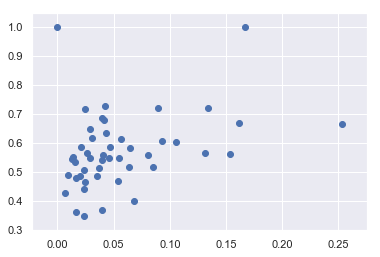

In [37]:
plt.scatter(race['percent_black'], result['percent_decimal'])

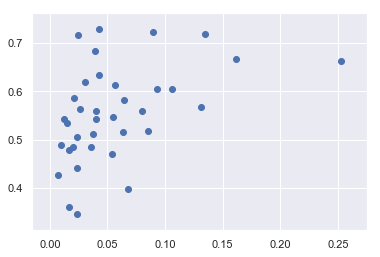

In [188]:
race = race.drop([1,5,12,16,23, 28,32,35,40,41,46])
result = result.drop([1,5,12,16,23,28,32,35,40,41,46])
plt.scatter(race['percent_black'], result['percent_decimal'])

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
X = race['percent_black']
y = result['percent_decimal']

from sklearn.model_selection import train_test_split

import statsmodels as stats

#X = stats.tools.tools.add_constant(X)




In [40]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X = sm.add_constant(X)

model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()

In [41]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        percent_decimal   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     6.010
Date:                Mon, 01 Apr 2019   Prob (F-statistic):             0.0182
Time:                        15:40:19   Log-Likelihood:                 32.276
No. Observations:                  47   AIC:                            -60.55
Df Residuals:                      45   BIC:                            -56.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5238      0.027     19.294

In [42]:
x_ = [0., 0.25]
y_ = [.8786*0 + 0.5052, .8786*.25 + 0.5052]


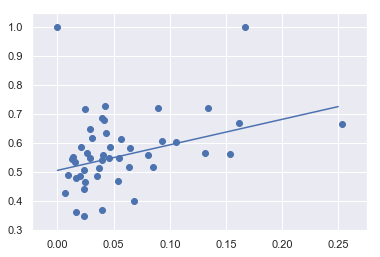

In [43]:
plt.scatter(race['percent_black'], result['percent_decimal'])
plt.plot(x_,y_)
plt.show()

percent black population vs. percent of total vote share.

for every 1% increase in black population vote share increases about .88%

on average black voters went for anna at about 77%-100% (black population too small to narrow beyond that

In [44]:
race['percent_white'] = race['White'] / race['total']

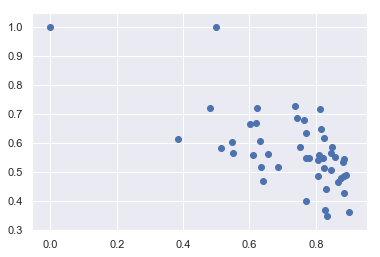

In [45]:
plt.scatter(race['percent_white'], result['percent_decimal'])

In [46]:
X = race['percent_white']
y = result['percent_decimal']
X = sm.add_constant(X)

model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        percent_decimal   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     35.34
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           3.78e-07
Time:                        15:40:21   Log-Likelihood:                 42.950
No. Observations:                  47   AIC:                            -81.90
Df Residuals:                      45   BIC:                            -78.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9481      0.065     14.654

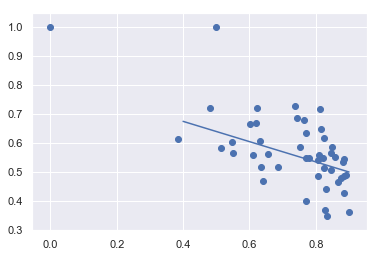

In [47]:
x_ = [0.4, 0.9]
y_= [0.674, 0.4995]
plt.scatter(race['percent_white'], result['percent_decimal'])
plt.plot(x_,y_)

percent white population vs percent total vote share.

for every 1% increase in white population share of vote decreased about .35%

on average white voters went for anna at about 46%-55%

In [48]:
race['percent_hispanic'] = race['Hispanic'] / race['total']

In [49]:
X = race['percent_hispanic']
y = result['percent_decimal']
X = sm.add_constant(X)

model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        percent_decimal   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     26.79
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           5.11e-06
Time:                        15:40:28   Log-Likelihood:                 40.307
No. Observations:                  47   AIC:                            -76.61
Df Residuals:                      45   BIC:                            -72.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4993      0.021  

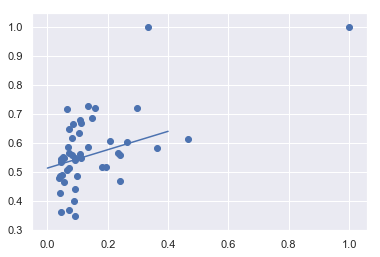

In [50]:
x_ = [0., 0.4]
y_= [0.513, 0.6397]
plt.scatter(race['percent_hispanic'], result['percent_decimal'])
plt.plot(x_,y_)

percent hispanic population vs total share of vote

for every 1% increase in hispanic population vote share increased about .32%

on average hispanic voters went for anna at 70%-90%

In [51]:
race['percent_asian'] = race['Asian_Pacific'] / race['total']
X = race['percent_asian']
y = result['percent_decimal']
X = sm.add_constant(X)

model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        percent_decimal   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.1377
Date:                Mon, 01 Apr 2019   Prob (F-statistic):              0.712
Time:                        15:40:31   Log-Likelihood:                 29.402
No. Observations:                  47   AIC:                            -54.80
Df Residuals:                      45   BIC:                            -51.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5872      0.042     13.904

In [52]:
race['percent_na'] = race['Not_Given'] / race['total']
X = race['percent_na']
y = result['percent_decimal']
X = sm.add_constant(X)

model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        percent_decimal   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.2868
Date:                Mon, 01 Apr 2019   Prob (F-statistic):              0.595
Time:                        15:40:32   Log-Likelihood:                 29.479
No. Observations:                  47   AIC:                            -54.96
Df Residuals:                      45   BIC:                            -51.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6058      0.064      9.505      0.0

In [53]:
with connection.cursor() as cursor:
    sql = 'select * from gender_by_precinct_2018;'
    cursor.execute(sql)
    gender = cursor.fetchall()

In [54]:
gender = pd.DataFrame.from_dict(gender)


In [19]:
gender = gender.drop([1,5,12,16,23,28,32,35,40,41,46])

In [55]:
gender['total'] = gender['MALE'] + gender['FEMALE'] + gender['NOT_GIVEN']
gender['percent_male'] = gender['MALE'] / gender['total']
gender['percent_female'] = gender['FEMALE'] / gender['total']

In [56]:
X = gender['percent_female']
y = result['percent_decimal']
X = sm.add_constant(X)

model = sm.OLS(y.astype(float), X.astype(float))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        percent_decimal   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.278
Date:                Mon, 01 Apr 2019   Prob (F-statistic):              0.138
Time:                        15:40:39   Log-Likelihood:                 30.491
No. Observations:                  47   AIC:                            -56.98
Df Residuals:                      45   BIC:                            -53.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3921      0.121      3.

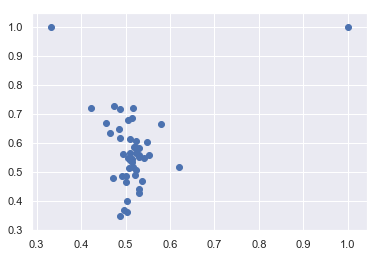

In [57]:
x_ = [0.35, 0.525]
y_= [0.519, 0.6397]

plt.scatter(gender['percent_female'], result['percent_decimal'])

In [58]:
import geopandas as geo

In [59]:
precincts = geo.read_file('May2016Precinct_region.shp')
precincts['PRECINCT'] = pd.to_numeric(precincts['PRECINCT'])
print(precincts.dtypes)

PRECINCT     int64
CONGRESS    object
geometry    object
dtype: object


In [60]:
precinct_47 = precincts.merge(result, how='right', left_on='PRECINCT', right_on='PRECINCT')
print(precinct_47)

    PRECINCT CONGRESS                                           geometry  \
0        302       07  POLYGON Z ((-81.347495 28.51715 0, -81.3474960...   
1        303       07  POLYGON Z ((-81.343416 28.52417 0, -81.343497 ...   
2        304       07  POLYGON Z ((-81.324856 28.524288 0, -81.325434...   
3        305       07  POLYGON Z ((-81.310394 28.524428 0, -81.310409...   
4        323       10  POLYGON Z ((-81.310204 28.497135 0, -81.31021 ...   
5        324       07  POLYGON Z ((-81.310333 28.517108 0, -81.310683...   
6        325       07  POLYGON Z ((-81.330955 28.513311 0, -81.331321...   
7        326       07  POLYGON Z ((-81.34745100000001 28.509555 0, -8...   
8        327       07  POLYGON Z ((-81.36194999999999 28.508756 0, -8...   
9        328       10  POLYGON Z ((-81.37609 28.494684 0, -81.376231 ...   
10       334       10  POLYGON Z ((-81.330557 28.480525 0, -81.330583...   
11       335       10  POLYGON Z ((-81.330788 28.482339 0, -81.330789...   
12       336

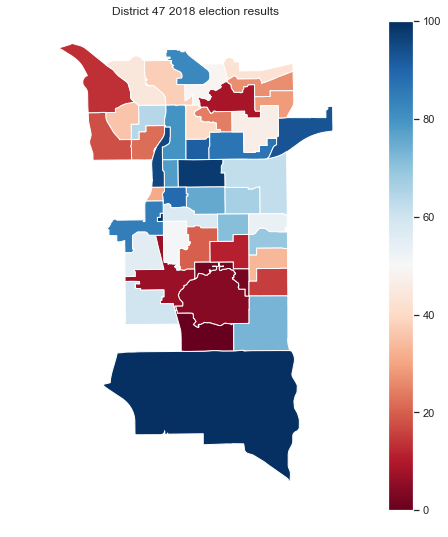

In [61]:
variable = 'percent'
vmin, vmax = 0,100
fig, ax = plt.subplots(1, figsize=(15,9))

precinct_47.plot(column='percent', cmap='RdBu', ax=ax)

ax.axis('off')
ax.set_title('District 47 2018 election results')
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In [62]:
fig.savefig('map_export.png', dpi=300)

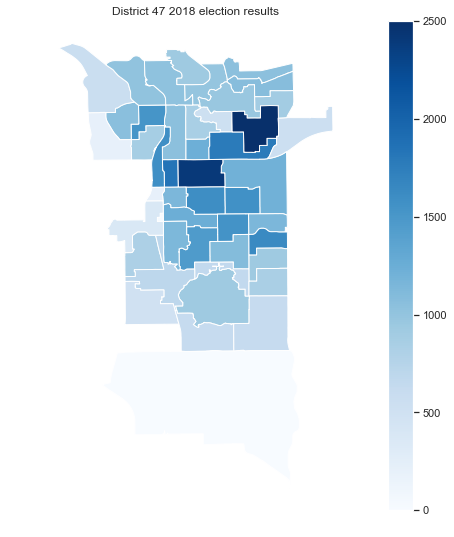

In [71]:
variable = 'TOTAL_VOTES'
vmin, vmax = 0,2500
fig, ax = plt.subplots(1, figsize=(15,9))

precinct_47.plot(column='TOTAL_VOTES', cmap='Blues', ax=ax)

ax.axis('off')
ax.set_title('District 47 2018 election results')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In [67]:
print(precinct_47)

    PRECINCT CONGRESS                                           geometry  \
0        302       07  POLYGON Z ((-81.347495 28.51715 0, -81.3474960...   
1        303       07  POLYGON Z ((-81.343416 28.52417 0, -81.343497 ...   
2        304       07  POLYGON Z ((-81.324856 28.524288 0, -81.325434...   
3        305       07  POLYGON Z ((-81.310394 28.524428 0, -81.310409...   
4        323       10  POLYGON Z ((-81.310204 28.497135 0, -81.31021 ...   
5        324       07  POLYGON Z ((-81.310333 28.517108 0, -81.310683...   
6        325       07  POLYGON Z ((-81.330955 28.513311 0, -81.331321...   
7        326       07  POLYGON Z ((-81.34745100000001 28.509555 0, -8...   
8        327       07  POLYGON Z ((-81.36194999999999 28.508756 0, -8...   
9        328       10  POLYGON Z ((-81.37609 28.494684 0, -81.376231 ...   
10       334       10  POLYGON Z ((-81.330557 28.480525 0, -81.330583...   
11       335       10  POLYGON Z ((-81.330788 28.482339 0, -81.330789...   
12       336